<a href="https://colab.research.google.com/github/jimxliu/8puzzle/blob/master/cancer_project_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
ls 'gdrive/My Drive/cancer_classification_nn'

cancer_project_nn.ipynb  features_train_all.npy  labels_train_all.npy
features_test.npy        labels_test.npy         masked_features.npy


### load data

In [30]:
import numpy as np
features_train_all = np.load('gdrive/My Drive/cancer_classification_nn/features_train_all.npy')
labels_train_all = np.load('gdrive/My Drive/cancer_classification_nn/labels_train_all.npy')
features_test = np.load('gdrive/My Drive/cancer_classification_nn/features_test.npy')
labels_test = np.load('gdrive/My Drive/cancer_classification_nn/labels_test.npy')
mask = np.load('gdrive/My Drive/cancer_classification_nn/masked_features.npy')

print(features_train_all.shape)
print(labels_train_all.shape)
print(features_test.shape)
print(labels_test.shape)
print(mask.shape, mask[mask==True].shape)

(1360, 20531)
(1360,)
(340, 20531)
(340,)
(20531,) (100,)


### Split train_all into train and validation datasets

In [31]:
from sklearn.model_selection import train_test_split
features_train, features_val, labels_train, labels_val = train_test_split(features_train_all,
                                                                         labels_train_all,
                                                                         test_size=0.2,
                                                                         shuffle=True)
print(features_train.shape)
print(labels_train.shape)
print(features_val.shape)
print(labels_val.shape)

(1088, 20531)
(1088,)
(272, 20531)
(272,)


### select 100 features extracted from RFE

In [32]:
features_train = features_train[:,mask]
features_val = features_val[:,mask]
features_test = features_test[:,mask]
print(features_train.shape)
print(features_val.shape)
print(features_test.shape)

(1088, 100)
(272, 100)
(340, 100)


In [0]:
import keras
import matplotlib.pyplot as plt

### build a sequential NN model

In [34]:
model =  keras.Sequential()
# input layer
model.add(keras.layers.Dense(50, activation='relu', input_shape=(100,)))
# hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
# output layer
model.add(keras.layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 357       
Total params: 10,507
Trainable params: 10,507
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
callback = [keras.callbacks.EarlyStopping(monitor='val_lost', min_delta=1e-3, patience=2)]

### train the model

In [37]:
history = model.fit(features_train, labels_train,
                   epochs=40,
                   batch_size = 50,
                   validation_data = (features_val,  labels_val))

Train on 1088 samples, validate on 272 samples
Epoch 1/40
1088/1088 [==============================] - 0s 350us/step - loss: 1.8473 - acc: 0.3428 - val_loss: 1.7061 - val_acc: 0.4485
Epoch 2/40
1088/1088 [==============================] - 0s 40us/step - loss: 1.4742 - acc: 0.5441 - val_loss: 1.2075 - val_acc: 0.7022
Epoch 3/40
1088/1088 [==============================] - 0s 41us/step - loss: 0.9233 - acc: 0.8116 - val_loss: 0.6445 - val_acc: 0.8860
Epoch 4/40
1088/1088 [==============================] - 0s 37us/step - loss: 0.4817 - acc: 0.9007 - val_loss: 0.3567 - val_acc: 0.9191
Epoch 5/40
1088/1088 [==============================] - 0s 37us/step - loss: 0.2826 - acc: 0.9301 - val_loss: 0.2411 - val_acc: 0.9559
Epoch 6/40
1088/1088 [==============================] - 0s 41us/step - loss: 0.1876 - acc: 0.9632 - val_loss: 0.1627 - val_acc: 0.9706
Epoch 7/40
1088/1088 [==============================] - 0s 38us/step - loss: 0.1331 - acc: 0.9724 - val_loss: 0.1321 - val_acc: 0.9743
Epoch 8

In [0]:
def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  
  plt.xlim([0,max(history.epoch)])

### Plot accuracy score per epoch between training and validation data


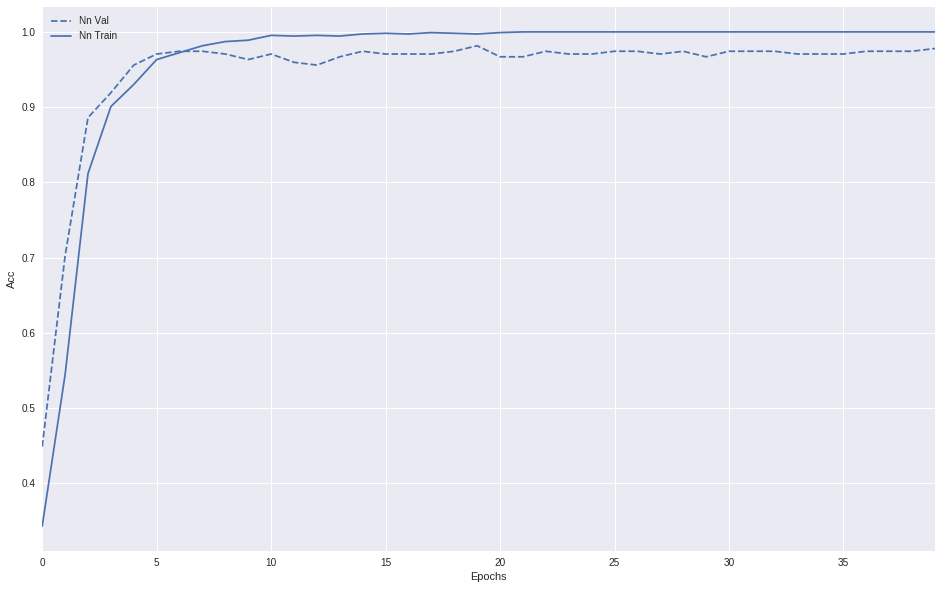

In [40]:
plot_history([("NN", history)])

In [41]:
test_loss, test_acc = model.evaluate(features_test, labels_test)

print('Test accuracy:', test_acc)

340/340 [==============================] - 0s 41us/step
Test accuracy: 0.9441176470588235


In [0]:
labels_pred = np.argmax(model.predict(features_test), axis=1)


### Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
label_names = ["BRCA","PRAD","LUAD","KIRC","COAD","UNK","NE"]
label_values = [0,1,2,3,4,5,6]


In [59]:
cm = confusion_matrix(labels_test,labels_pred, labels=label_values)

print("    ", end=" ")
for name in label_names:
    print(name, end=" ")
print()
for i in range(np.size(cm, axis=0)):
  print("{:>4s}".format(label_names[i]), end=" ")
  for val in cm[i]:
    print("{:<4d}".format(val),end=" ")
  print()
  


     BRCA PRAD LUAD KIRC COAD UNK NE 
BRCA 45   0    0    0    0    0    3    
PRAD 0    57   0    0    0    1    1    
LUAD 0    0    58   0    0    1    0    
KIRC 0    0    0    49   0    0    0    
COAD 0    3    0    0    47   0    0    
 UNK 1    0    3    0    0    33   1    
  NE 1    2    0    1    0    1    32   


### Classification Report

In [60]:
print(classification_report(labels_test, labels_pred, target_names=label_names))

             precision    recall  f1-score   support

       BRCA       0.96      0.94      0.95        48
       PRAD       0.92      0.97      0.94        59
       LUAD       0.95      0.98      0.97        59
       KIRC       0.98      1.00      0.99        49
       COAD       1.00      0.94      0.97        50
        UNK       0.92      0.87      0.89        38
         NE       0.86      0.86      0.86        37

avg / total       0.94      0.94      0.94       340

